# IMPORT LIBS

In [27]:
import keras
from keras.layers import Embedding, Flatten, Dense, LSTM, Dropout, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# FUNCTIONS

In [1]:
def plot_history(history):
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Graphic the training history - Accuracy
    axes[0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0].set_title('Model Training History - Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(True)

    # Graphic the training history - Loss
    axes[1].plot(history.history['loss'], label='Training Loss')
    axes[1].plot(history.history['val_loss'], label='Validation Loss')
    axes[1].set_title('Model Training History - Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

# IMDB SPANISH DATASET

In [3]:
# Load the CSV file into a pandas DataFrame
# Change the path of each code execution
df = pd.read_csv("C:\\Users\\Lenovo\\Documents\\Talento Tech\\IA\\Datasets\\Kaggle\\NLP\\IMDB Dataset SPANISH.csv")
print(df.head())

   Unnamed: 0                                          review_en  \
0           0  One of the other reviewers has mentioned that ...   
1           1  A wonderful little production. The filming tec...   
2           2  I thought this was a wonderful way to spend ti...   
3           3  Basically there's a family where a little boy ...   
4           4  Petter Mattei's "Love in the Time of Money" is...   

                                           review_es sentiment sentimiento  
0  Uno de los otros críticos ha mencionado que de...  positive    positivo  
1  Una pequeña pequeña producción.La técnica de f...  positive    positivo  
2  Pensé que esta era una manera maravillosa de p...  positive    positivo  
3  Básicamente, hay una familia donde un niño peq...  negative    negativo  
4  El "amor en el tiempo" de Petter Mattei es una...  positive    positivo  


In [4]:
# Use only rows in spanish 
df_es = {
    'reseña': list(df['review_es']),
    'sentimiento': list(df['sentimiento'])
}

df_es = pd.DataFrame(df_es)

In [6]:
# Checking dataset description
print(df_es.describe())

                                                   reseña sentimiento
count                                               50000       50000
unique                                              49599           2
top     Hilarante, limpio, alegre y digno de cita.¿Qué...    positivo
freq                                                    4       25000


In [8]:
# Sentiment count
print("Total:\n", df_es['sentimiento'].value_counts())

Total:
 sentimiento
positivo    25000
negativo    25000
Name: count, dtype: int64


In [10]:
review = []
sentences = list(df_es['reseña'])

for sen in sentences:
  review.append(sen)

In [11]:
labels = df_es['sentimiento']
labels = np.array(list(map(lambda x: 1 if x=="positive" else 0, labels)))

In [12]:
train_sen, test_sen, train_lbl, test_lbl = train_test_split(review, labels, test_size=0.2)

In [83]:
# Parameters
vocab_size = 5000
max_length = 120
embedding_dim = 16
trunc_type = 'post'
oov_tok = "<OOV>"

In [84]:
# Initialize the tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(train_sen)
word_index = tokenizer.word_index

# Generate and pad the training sentences
sequences = tokenizer.texts_to_sequences(train_sen)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

# Generate and pad the test sentences
test_sequences = tokenizer.texts_to_sequences(test_sen)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)

In [60]:
print('Training files:\n', padded, train_lbl)
print('Testing files:\n', test_padded, test_lbl)

Training files:
 [[   23     7  1560 ...     4  1302     4]
 [    9   115    10 ...     3    93     2]
 [  150   855     3 ...   522   131     7]
 ...
 [    0     0     0 ...  1288    11  1007]
 [    0     0     0 ...  2971    10  1232]
 [    0     0     0 ... 10600    19   411]] [0 0 0 ... 0 0 0]
Testing files:
 [[ 1477  2300     7 ...     4     3    13]
 [   52    11  1054 ... 22554     8   123]
 [    3   208    93 ...     2    12 10097]
 ...
 [    0     0     0 ...    74   274   206]
 [    0     0     0 ... 13264    28    84]
 [  175     2 16206 ...    14    32   400]] [0 0 0 ... 0 0 0]


# MODEL LSTM

In [85]:
model = keras.Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(64, return_sequences=True),
    Dropout(0.5),  # Agregar Dropout después de la capa LSTM
    LSTM(32),
    Dropout(0.5),  # Agregar Dropout después de la segunda capa LSTM
    Dense(1, activation='sigmoid')
])

In [86]:
# Setup the training parameters
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [87]:
# Print the model summary
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [89]:
# Train the model
history = model.fit(
    padded,
    train_lbl,
    epochs = 10,
    batch_size=16,
    verbose = 1,
    validation_data = (test_padded, test_lbl)
)

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 130s 52ms/step - accuracy: 1.0000 - loss: 6.6498e-05 - val_accuracy: 1.0000 - val_loss: 6.7496e-07
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 119s 48ms/step - accuracy: 1.0000 - loss: 1.3813e-05 - val_accuracy: 1.0000 - val_loss: 8.3136e-08
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 115s 46ms/step - accuracy: 1.0000 - loss: 4.1816e-06 - val_accuracy: 1.0000 - val_loss: 1.0541e-08
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 115s 46ms/step - accuracy: 1.0000 - loss: 2.2280e-06 - val_accuracy: 1.0000 - val_loss: 1.0808e-09
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 121s 49ms/step - accuracy: 1.0000 - loss: 6.7988e-07 - val_accuracy: 1.0000 - val_loss: 1.3766e-10
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 150s 60ms/step - accuracy: 1.0000 - loss: 1.9727e-07 - val_accuracy: 1.0000 - val_loss: 2.2223e-11
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 154s 62ms/step - accuracy: 1.0000 - loss: 9.4372e-08 - val_accuracy: 1.0000 - val_loss: 3.9032e-12
Epoch 8/10
25

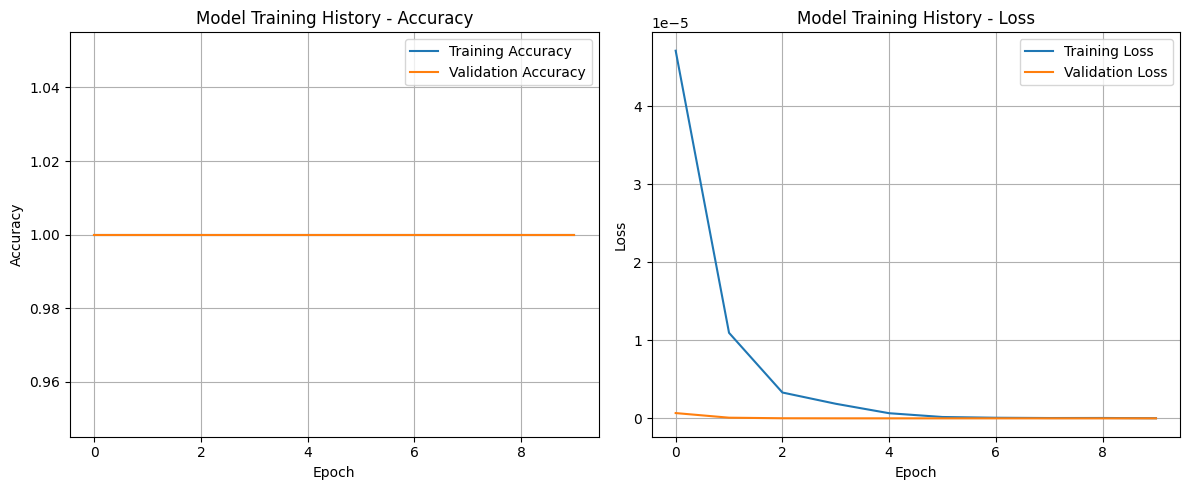

In [90]:
plot_history(history)

In [91]:
# Evaluar el modelo en datos de prueba
test_loss, test_accuracy = model.evaluate(test_padded, test_lbl)

print("Exactitud en el conjunto de prueba:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 1.0000 - loss: 4.7359e-14
Exactitud en el conjunto de prueba: 1.0


In [31]:
prueba = [
    "La comida en este restaurante es excelente, siempre vuelvo por más.",
    "No recomendaría este lugar a nadie, la comida estaba fría y el servicio era terrible.",
    "¡Qué película tan emocionante! Me mantuvo al borde de mi asiento durante toda la película.",
    "El producto llegó rápido y en perfectas condiciones. Muy satisfecho con mi compra.",
    "El servicio al cliente es increíblemente malo en esta tienda. No vuelvo nunca más.",
    "Una experiencia maravillosa, el personal fue muy amable y atento.",
    "No estoy contento con la calidad de los productos que recibí. No se parecen en nada a las fotos en línea.",
    "Este libro es una obra maestra. No puedo dejar de recomendarlo a todos mis amigos.",
    "El hotel en el que nos alojamos durante nuestras vacaciones era horrible. Habitaciones sucias y personal poco profesional.",
    "El último episodio de mi serie favorita me dejó sin palabras. ¡Qué final tan impactante!",
    "El producto es tal como se describe en la página web. Muy contento con mi compra.",
    "La comida en este lugar es decepcionante. No vale la pena el precio que pagas.",
    "¡Qué gran concierto! La banda dio lo mejor de sí misma y la audiencia estaba emocionada.",
    "No estoy seguro de por qué a tanta gente le gusta esta película. La encontré aburrida y predecible.",
    "El servicio de entrega fue muy rápido. Recibí mi pedido en menos de 24 horas.",
    "El personal de este restaurante es grosero y poco profesional. No volveré nunca más.",
    "¡Qué gran día! El clima era perfecto y pasé tiempo con amigos y familiares.",
    "El producto llegó dañado y tardaron semanas en procesar mi devolución. Muy decepcionado.",
    "El concierto fue cancelado en el último minuto y no nos dieron ninguna explicación. Una falta de respeto total.",
    "Me encantó este libro. Los personajes eran fascinantes y la trama era emocionante.",
    "La comida en este lugar es deliciosa. Recomiendo encarecidamente probar el plato de la casa.",
    "El servicio al cliente en esta tienda es excelente. Siempre me ayudan con cualquier problema que tenga.",
    "La calidad de este producto es pésima. Se rompió después de un solo uso.",
    "¡Qué experiencia tan horrible! El personal era grosero y la comida estaba fría cuando finalmente llegó.",
    "Esta película es la peor que he visto en mi vida. No pierdas tu tiempo viéndola.",
    "El servicio de entrega fue lento y el paquete llegó dañado. No estoy contento en absoluto.",
    "La actuación en esta obra de teatro fue impresionante. Los actores realmente dieron lo mejor de sí mismos.",
    "No estoy seguro de qué esperaba, pero este producto fue una gran decepción. No lo recomendaría a nadie.",
    "El servicio en este restaurante es excelente. El personal es amable y la comida es deliciosa.",
    "¡Qué película tan aburrida! Me quedé dormido antes de que terminara.",
    "El producto que pedí nunca llegó y el servicio de atención al cliente no fue de ayuda en absoluto.",
    "¡Qué día tan desastroso! Todo lo que podría salir mal, salió mal.",
    "Este libro es una pérdida de tiempo. La trama es débil y los personajes son poco interesantes.",
    "La comida en este restaurante es increíble. Volvería una y otra vez.",
    "El servicio al cliente en esta tienda es terrible. Los empleados son groseros y poco serviciales.",
    "¡Qué gran experiencia de compra! El producto era exactamente lo que estaba buscando.",
    "No puedo creer lo mal que fue este concierto. La banda estaba fuera de sintonía y el sonido era horrible.",
    "El producto llegó tarde y estaba dañado cuando finalmente llegó. Muy decepcionado con mi compra.",
    "Esta película es increíble. Me reí, lloré y me mantuvo intrigado hasta el final.",
    "El servicio en este restaurante es terrible. Esperamos más de una hora para nuestra comida.",
    "No puedo creer que haya perdido mi tiempo viendo esta película. La trama era predecible y los actores eran malos.",
    "El producto que recibí no era lo que esperaba en absoluto. No recomendaría comprarlo.",
    "La comida en este lugar es terrible. No volveré nunca más.",
    "¡Qué experiencia tan maravillosa! El personal era amable y servicial, y la comida era deliciosa.",
    "No estoy contento con este producto en absoluto. La calidad es baja y no cumple con mis expectativas.",
    "Esta película es la mejor que he visto en años. La trama era emocionante y los actores eran increíbles.",
    "El servicio de entrega fue rápido y el producto llegó en perfecto estado. Muy satisfecho con mi compra.",
    "La comida en este restaurante es asquerosa. No volveré nunca más.",
    "¡Qué decepción! El producto que recibí estaba defectuoso y no pude obtener un reembolso.",
    "Me encantó este concierto. La banda tocó todas mis canciones favoritas y el ambiente era genial.",
    "El servicio en este restaurante es lento y descuidado. No volveré nunca más."
]

In [37]:
def clasificar(reseña):
    tokenize = tokenizer.texts_to_sequences([reseña])
    tokenize = pad_sequences(tokenize, maxlen=max_length)
    text_classified = model.predict(tokenize)[0][0]

    # Determinar la clase basada en la probabilidad
    if text_classified >= 0.5:
        clase = 'positivo'
    else:
        clase = 'negativo'

    print("Reseña clasificada\n", reseña)
    print("Sentimiento: ", clase)

In [92]:
# Evaluar el modelo en datos de prueba
for sen_prueba in prueba:
    clasificar(sen_prueba)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
Reseña clasificada
 La comida en este restaurante es excelente, siempre vuelvo por más.
Sentimiento:  negativo
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Reseña clasificada
 No recomendaría este lugar a nadie, la comida estaba fría y el servicio era terrible.
Sentimiento:  negativo
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Reseña clasificada
 ¡Qué película tan emocionante! Me mantuvo al borde de mi asiento durante toda la película.
Sentimiento:  negativo
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Reseña clasificada
 El producto llegó rápido y en perfectas condiciones. Muy satisfecho con mi compra.
Sentimiento:  negativo
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Reseña clasificada
 El servicio al cliente es increíblemente malo en esta tienda. No vuelvo nunca más.
Sentimiento:  negativo
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Reseña clasificada
 Una experiencia maravillosa, el personal fue muy amable y atento.
Sentimiento:  negativo
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/ste